## Importing Libraries

In [1]:
from zipfile import ZipFile
file_name = '/content/brain_tumor_dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
import tensorflow as tf

import os,glob
import cv2
from collections import Counter
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from keras.layers import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten

%matplotlib inline
import matplotlib.pyplot as plt

<ipython-input-2-18f4a31a4ffc>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


### Storing List of image directories of images (data)

In [3]:
original_data_path = './brain_tumor_dataset'
images_dir = []
for entry in os.scandir(original_data_path):
    if entry.is_dir():
        images_dir.append(entry.path)
images_dir

['./brain_tumor_dataset/no', './brain_tumor_dataset/yes']

### Original 4 Sample images consists of different sizes and unscaled of braintumor and normal MRI scans

(201, 173, 3)


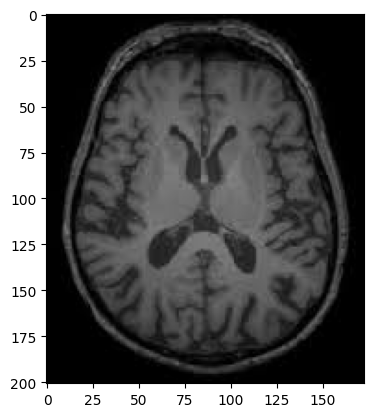

In [4]:
n1_image= cv2.imread('./brain_tumor_dataset/no/10 no.jpg')
print(n1_image.shape)
plt.imshow(n1_image)

### Visualizing Image as an array

In [5]:
n1_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### Uniques values of a single sample image

In [6]:
np.unique(n1_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 139], dtype=uint8)

(214, 235, 3)


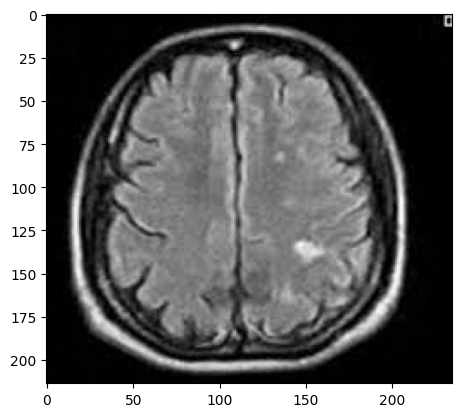

In [7]:
n2_image= cv2.imread('./brain_tumor_dataset/no/24 no.jpg')
print(n2_image.shape)
plt.imshow(n2_image)

(1200, 1059, 3)


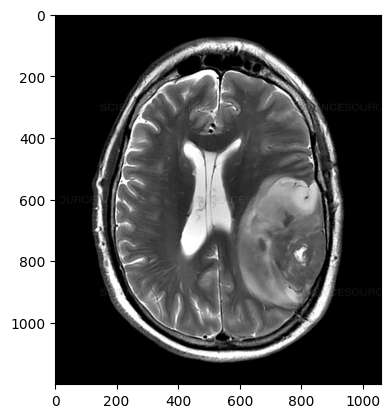

In [8]:
y1_image= cv2.imread('./brain_tumor_dataset/yes/Y162.jpg')
print(y1_image.shape)
plt.imshow(y1_image)

(380, 310, 3)


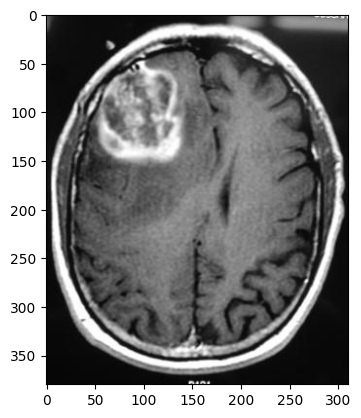

In [9]:
y2_image= cv2.imread('./brain_tumor_dataset/yes/Y15.jpg')
print(y2_image.shape)
plt.imshow(y2_image)

### Storing all the image file paths in a dictionary format

In [10]:
dataset_dict = {}
for image_dir in images_dir:
    image_labels=image_dir.split('/')[-1]
    dataset_dict[image_labels] = []
    for entry in os.scandir(image_dir):
        dataset_dict[image_labels].append(entry.path)


In [11]:
dataset_dict

{'no': ['./brain_tumor_dataset/no/10 no.jpg',
  './brain_tumor_dataset/no/44no.jpg',
  './brain_tumor_dataset/no/No15.jpg',
  './brain_tumor_dataset/no/3 no.jpg',
  './brain_tumor_dataset/no/28 no.jpg',
  './brain_tumor_dataset/no/no 5.jpeg',
  './brain_tumor_dataset/no/14 no.jpg',
  './brain_tumor_dataset/no/4 no.jpg',
  './brain_tumor_dataset/no/no 100.jpg',
  './brain_tumor_dataset/no/35 no.jpg',
  './brain_tumor_dataset/no/43 no.jpg',
  './brain_tumor_dataset/no/21 no.jpg',
  './brain_tumor_dataset/no/22 no.jpg',
  './brain_tumor_dataset/no/17 no.jpg',
  './brain_tumor_dataset/no/no 98.jpg',
  './brain_tumor_dataset/no/no 2.jpg',
  './brain_tumor_dataset/no/N1.JPG',
  './brain_tumor_dataset/no/41 no.jpg',
  './brain_tumor_dataset/no/N20.JPG',
  './brain_tumor_dataset/no/9 no.jpg',
  './brain_tumor_dataset/no/N5.jpg',
  './brain_tumor_dataset/no/50 no.jpg',
  './brain_tumor_dataset/no/no 4.jpg',
  './brain_tumor_dataset/no/no.jpg',
  './brain_tumor_dataset/no/no 7.jpeg',
  './brain_

### Labels as a dictionary

In [12]:
class_labels_dict= {
    'no': 'N',
    'yes': 'Y'
}

In [13]:
class_labels_dict

{'no': 'N', 'yes': 'Y'}

## Dataset Preparation

In [14]:
X = []
y= []

for image_label, image_file_path in dataset_dict.items():
    for file_path in image_file_path:
        image= cv2.imread(file_path)
        reshaped_image = cv2.resize(image,(224,224))/255
        X.append(reshaped_image)
        y.append(class_labels_dict[image_label])

In [15]:
X[0].shape

(224, 224, 3)

In [16]:
np.unique(X[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [17]:
len(y)

253

In [18]:
y

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y'

### Dataset Samples

In [19]:
print(f'Total number of dataset samples and each image shapes are {len(X)}, {X[0].shape}')
print(f'Total number of barin_tumor and normall samples in the dataset are {Counter(y)}')


Total number of dataset samples and each image shapes are 253, (224, 224, 3)
Total number of barin_tumor and normall samples in the dataset are Counter({'Y': 155, 'N': 98})


### Visualizing the images after scaling the image

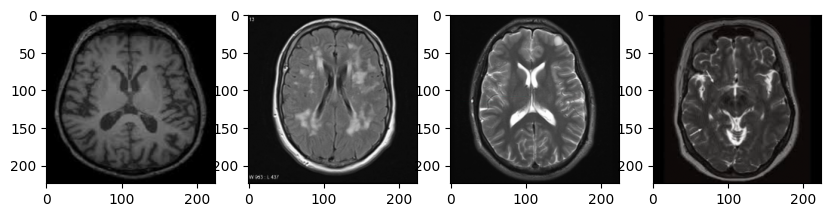

In [20]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X[i], cmap='gray')
plt.show()

### Pre-processing

In [21]:
label_encoder= preprocessing.LabelEncoder()
le_y = label_encoder.fit_transform(y)
y_label= tf.keras.utils.to_categorical(le_y, num_classes=2)
X_array = np.array(X).astype(float)

In [22]:
y[:10]

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']

In [23]:
y_label[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Preparing the data for training, Validation and Testing

In [24]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_array,y_label,test_size=0.1, random_state=42)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.1, random_state=20)

In [26]:
print(f'Total number of X_train samples and their shapes {len(X_train)}, {X_train.shape}')
print(f'Total number of X_val samples and their shapes {len(X_val)}, {X_val.shape}')
print(f'Total number of X_test samples and their shapes {len(X_test)}, {X_test.shape}')

print('-'*45)
print(f'Total number of brain tumor samples in y_train are {(y_train[:,1] == 1).sum()}')
print(f'Total number of MRI normal samples in y_train are {(y_train[:,0] == 1).sum()}')
print('-'*45)
print(f'Total number of brain tumor samples in y_val are {(y_val[:,1] == 1).sum()}')
print(f'Total number of MRI normal samples in y_val are {(y_val[:,0] == 1).sum()}')
print('-'*45)
print(f'Total number of brain tumor samples in y_test are {(y_test[:,1] == 1).sum()}')
print(f'Total number of MRI normal samples in y_test are {(y_test[:,0] == 1).sum()}')


Total number of X_train samples and their shapes 204, (204, 224, 224, 3)
Total number of X_val samples and their shapes 23, (23, 224, 224, 3)
Total number of X_test samples and their shapes 26, (26, 224, 224, 3)
---------------------------------------------
Total number of brain tumor samples in y_train are 126
Total number of MRI normal samples in y_train are 78
---------------------------------------------
Total number of brain tumor samples in y_val are 13
Total number of MRI normal samples in y_val are 10
---------------------------------------------
Total number of brain tumor samples in y_test are 16
Total number of MRI normal samples in y_test are 10


## Building a VGG16 Model

In [27]:
from keras.applications import vgg16

width, height = 224, 224

#### using a pretrained model
vgg = vgg16.VGG16(weights= 'imagenet', include_top= False, input_shape= (width, height,3))


### freezing the weights of all the layers except the top_layers
for layer in vgg.layers:
    layer.trainable= False

for (i,layer) in enumerate(vgg.layers):
    print(str(i) + ' '+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [28]:
def top_layers(bottom_model, num_classes):
    """ creating the top or head of the model that will be placed ontop of the bottomlayers """
    top_model= bottom_model.output
    top_model= GlobalAveragePooling2D()(top_model)
    top_model= Dense(1024, activation = 'relu')(top_model)
    top_model= Dense(512, activation = 'relu')(top_model)
    top_model= Dense(256, activation = 'relu')(top_model)
    top_model= Dense(num_classes, activation = 'softmax')(top_model)
    return top_model


In [29]:
from keras.models import Sequential

from keras.models import Model

num_classes= 2

vgg_final_layer = top_layers(vgg,num_classes)

### vgg final model
vgg_model= Model(inputs= vgg.input, outputs= vgg_final_layer)

print(vgg_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## compiling and training the model

In [30]:
vgg_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history_vgg= vgg_model.fit(X_train,y_train,batch_size=32, epochs=10,validation_data= (X_val, y_val),callbacks=[callback],verbose=1)

Epoch 1/10
7/7 [==============================] - 20s 1s/step - loss: 0.8394 - accuracy: 0.5049 - val_loss: 0.9019 - val_accuracy: 0.5652
Epoch 2/10
7/7 [==============================] - 1s 144ms/step - loss: 0.7348 - accuracy: 0.5686 - val_loss: 0.6295 - val_accuracy: 0.7391
Epoch 3/10
7/7 [==============================] - 1s 152ms/step - loss: 0.6279 - accuracy: 0.6520 - val_loss: 0.6033 - val_accuracy: 0.6522
Epoch 4/10
7/7 [==============================] - 1s 157ms/step - loss: 0.5784 - accuracy: 0.7843 - val_loss: 0.5509 - val_accuracy: 0.6957
Epoch 5/10
7/7 [==============================] - 1s 146ms/step - loss: 0.5022 - accuracy: 0.7843 - val_loss: 0.4645 - val_accuracy: 0.7391
Epoch 6/10
7/7 [==============================] - 1s 148ms/step - loss: 0.4414 - accuracy: 0.7990 - val_loss: 0.4266 - val_accuracy: 0.7826
Epoch 7/10
7/7 [==============================] - 1s 155ms/step - loss: 0.3998 - accuracy: 0.8137 - val_loss: 0.4688 - val_accuracy: 0.7826
Epoch 8/10
7/7 [======

## VGG16 Training and Validation Loss

range(1, 11)
[0.9019239544868469, 0.6295256614685059, 0.6033019423484802, 0.5508567094802856, 0.4644739031791687, 0.4265982508659363, 0.46881571412086487, 0.5727242827415466, 0.4107189178466797, 0.40664395689964294]


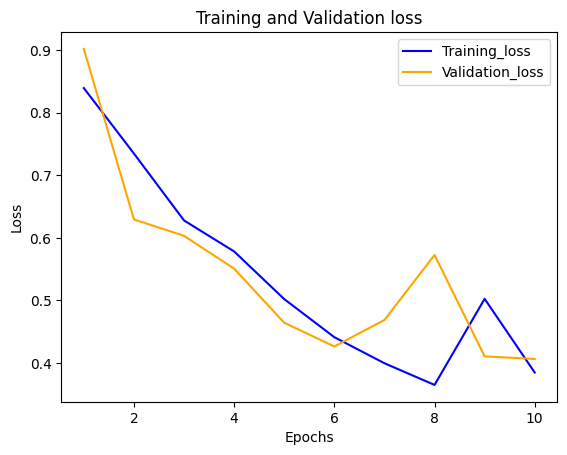

<Figure size 640x480 with 0 Axes>

In [31]:
training_loss= history_vgg.history['loss']
validation_loss= history_vgg.history['val_loss']

epochs = range(1,len(validation_loss)+1)
print(epochs)
print(validation_loss)
plt.plot(epochs,training_loss, 'b', label = 'Training_loss')
plt.plot(epochs,validation_loss, color='orange', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure()
plt.show()

### VGG16 Training and validation accuracy

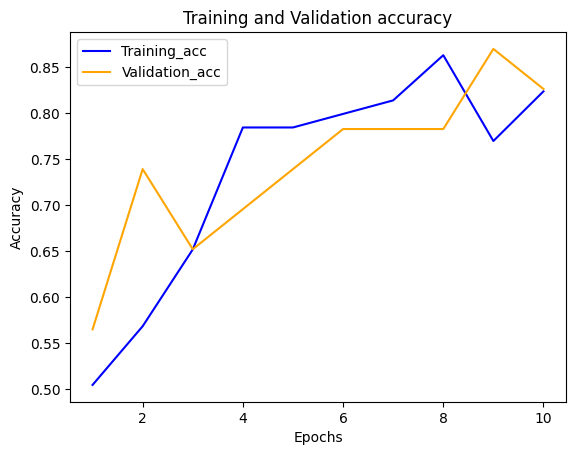

<Figure size 640x480 with 0 Axes>

In [32]:
training_acc= history_vgg.history['accuracy']
validation_acc= history_vgg.history['val_accuracy']

epochs = range(1,len(validation_acc)+1)

plt.plot(epochs,training_acc, 'b', label = 'Training_acc')
plt.plot(epochs,validation_acc, color='orange', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

vgg_predicted = vgg_model.predict(X_test)
vgg_ypred= np.argmax(vgg_predicted,axis=1)
print(f'Accuracy score of VGG 16 on test data is {accuracy_score(np.argmax(y_test,axis=1),vgg_ypred)}')

1/1 [==============================] - 4s 4s/step
Accuracy score of VGG 16 on test data is 0.7692307692307693


## RESNET50 Model

In [34]:
from tensorflow.keras.applications.resnet50 import ResNet50

#### base model
resnet =  ResNet50(weights= 'imagenet', include_top= False)

for layer in resnet.layers:
    layer.trainable= False

for (i,layer) in enumerate(resnet.layers):
    print(str(i) + ' '+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 Conv2D False
11 BatchNormalization False
12 Activation False
13 Conv2D False
14 Conv2D False
15 BatchNormalization False
16 BatchNormalization False
17 Add False
18 Activation False
19 Conv2D False
20 BatchNormalization False
21 Activation False
22 Conv2D False
23 BatchNormalization False
24 Activation False
25 Conv2D False
26 BatchNormalization False
27 Add False
28 Activation False
29 Conv2D False
30 BatchNormalization False
31 Activation False
32 Conv2D False
33 BatchNormalization False
34 Activation False
35 Conv2D False
36 BatchNormalization False
37 Add False
38 Activation False
39 Conv2D False
40 BatchNormalization False
41 Activation False
42 Conv2D False
43 BatchNormalization False
44 Activation False
45 Conv2D False
46 Conv2D False
47 BatchNormalization False
48 BatchNor

In [35]:
resnet_final_layer = top_layers(resnet,num_classes)

resnet_model= Model(inputs= resnet.input, outputs= resnet_final_layer)

print(resnet_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [36]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history_resnet50= resnet_model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_val,y_val),callbacks=[callback],verbose=1)

Epoch 1/10
7/7 [==============================] - 9s 601ms/step - loss: 0.9439 - accuracy: 0.5784 - val_loss: 1.2995 - val_accuracy: 0.5652
Epoch 2/10
7/7 [==============================] - 1s 106ms/step - loss: 0.8000 - accuracy: 0.5882 - val_loss: 0.6788 - val_accuracy: 0.6522
Epoch 3/10
7/7 [==============================] - 1s 118ms/step - loss: 0.6429 - accuracy: 0.6520 - val_loss: 0.6854 - val_accuracy: 0.5652
Epoch 4/10
7/7 [==============================] - 1s 107ms/step - loss: 0.6286 - accuracy: 0.6176 - val_loss: 0.6511 - val_accuracy: 0.5652
Epoch 5/10
7/7 [==============================] - 1s 107ms/step - loss: 0.6089 - accuracy: 0.6912 - val_loss: 0.6908 - val_accuracy: 0.6087
Epoch 6/10
7/7 [==============================] - 1s 119ms/step - loss: 0.5889 - accuracy: 0.6569 - val_loss: 0.6249 - val_accuracy: 0.7391
Epoch 7/10
7/7 [==============================] - 1s 107ms/step - loss: 0.5638 - accuracy: 0.6863 - val_loss: 0.6243 - val_accuracy: 0.7391
Epoch 8/10
7/7 [====

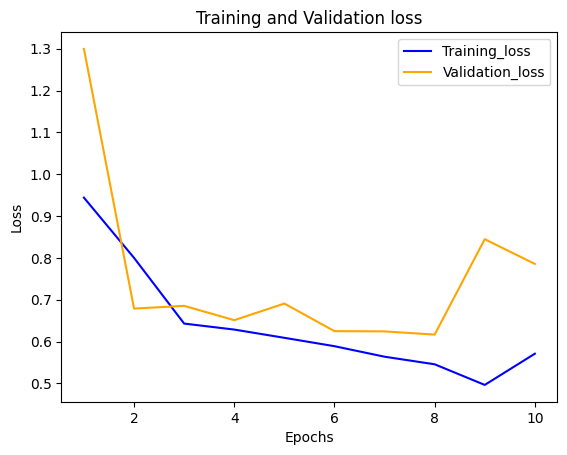

<Figure size 640x480 with 0 Axes>

In [38]:
def train_val_loss(training_loss,validation_loss,epochs):
  plt.plot(epochs,training_loss, 'b', label = 'Training_loss')
  plt.plot(epochs,validation_loss, color='orange', label = 'Validation_loss')
  plt.title('Training and Validation loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.figure()
  plt.show()

training_loss= history_resnet50.history['loss']
validation_loss= history_resnet50.history['val_loss']

epochs = range(1,len(validation_loss)+1)
train_val_loss(training_loss,validation_loss,epochs)

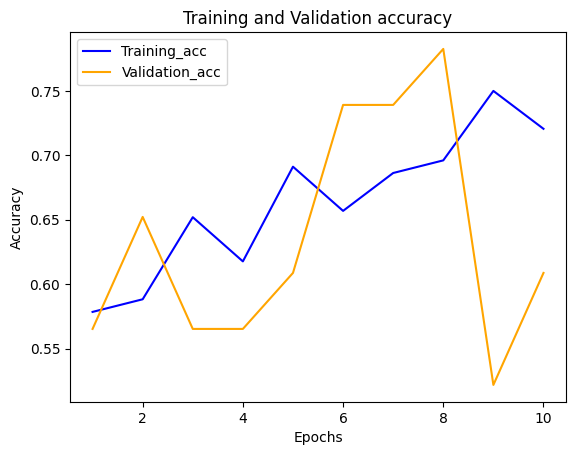

<Figure size 640x480 with 0 Axes>

In [39]:
def train_val_accuracy(training_acc,validation_acc,epochs):
  plt.plot(epochs,training_acc, 'b', label = 'Training_acc')
  plt.plot(epochs,validation_acc, color='orange', label = 'Validation_acc')
  plt.title('Training and Validation accuracy')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.figure()
  plt.show()

training_acc= history_resnet50.history['accuracy']
validation_acc= history_resnet50.history['val_accuracy']

epochs = range(1,len(validation_acc)+1)

train_val_accuracy(training_acc,validation_acc,epochs)

In [40]:
resnet_predicted = resnet_model.predict(X_test)
resnet_ypred= np.argmax(resnet_predicted,axis=1)
print(f'Accuracy score of Resnet 50 on test data is {accuracy_score(np.argmax(y_test,axis=1),resnet_ypred)}')

1/1 [==============================] - 2s 2s/step
Accuracy score of Resnet 50 on test data is 0.7692307692307693


## Building an Inceptionv3 model

In [41]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
inception_v3 = InceptionV3(weights='imagenet', include_top=False)

for layer in inception_v3.layers:
  layer.trainable=False

inception_v3_final_layer = top_layers(inception_v3,num_classes)

inception_v3_model= Model(inputs= inception_v3.input, outputs= inception_v3_final_layer)

print(inception_v3_model.summary())

inception_v3_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_inceptionv3 = inception_v3_model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val),callbacks=[callback],verbose=1)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                         

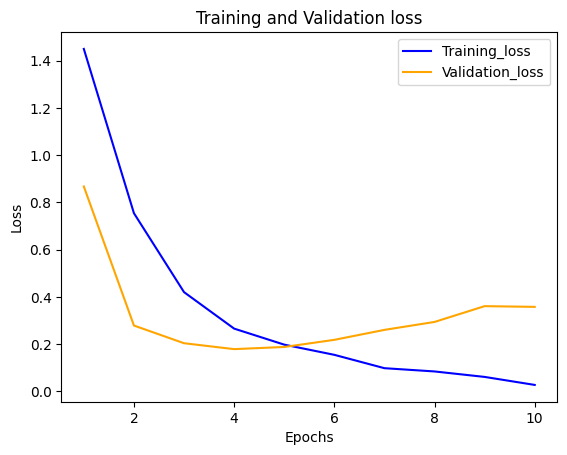

<Figure size 640x480 with 0 Axes>

In [42]:
training_loss= history_inceptionv3.history['loss']
validation_loss= history_inceptionv3.history['val_loss']

epochs = range(1,len(validation_loss)+1)
train_val_loss(training_loss,validation_loss,epochs)

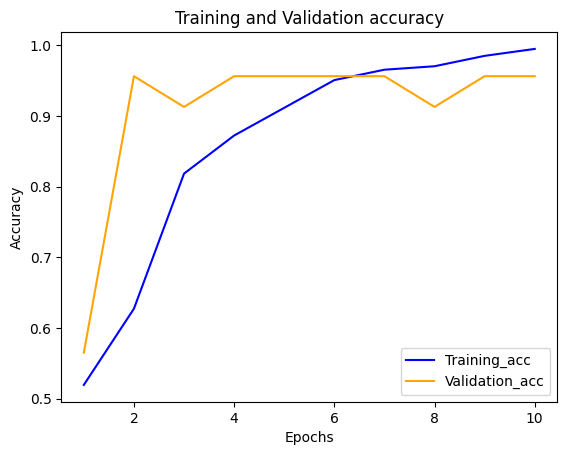

<Figure size 640x480 with 0 Axes>

In [43]:
training_acc= history_inceptionv3.history['accuracy']
validation_acc= history_inceptionv3.history['val_accuracy']

epochs = range(1,len(validation_acc)+1)

train_val_accuracy(training_acc,validation_acc,epochs)

In [44]:
inceptionv3_predicted = inception_v3_model.predict(X_test)
inception_ypred= np.argmax(inceptionv3_predicted,axis=1)
print(f'Accuracy score of Inception v3 on test data is {accuracy_score(np.argmax(y_test,axis=1),inception_ypred)}')

1/1 [==============================] - 3s 3s/step
Accuracy score of Inception v3 on test data is 0.9230769230769231


In [47]:
inception_v3_model.save("inception_v3_model.h5")